# Parkinson Disease Detection

In [41]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [42]:
data=pd.read_csv('C:\\Users\\91799\\OneDrive\\Desktop\\Parkinson.csv')
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [43]:
# creating a DataFrame of dataset
df=pd.DataFrame(data)

In [44]:
# shuffling the data
shuffled=df.sample(frac=1,random_state=2).reset_index()
shuffled

,index,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,10,phon_R01_S02_5,88.333,112.240,84.072,0.00505,0.00006,0.00254,0.00330,0.00763,...,0.03237,0.01166,21.118,1,0.611137,0.776156,-5.249770,0.391002,2.407313,0.249740
1,79,phon_R01_S20_2,100.770,115.697,85.545,0.01038,0.00010,0.00622,0.00576,0.01865,...,0.05320,0.02220,19.200,1,0.594387,0.790117,-4.913885,0.265699,2.398422,0.277948
2,164,phon_R01_S39_6,102.273,142.830,85.902,0.00907,0.00009,0.00493,0.00461,0.01480,...,0.04736,0.03882,18.447,1,0.671378,0.674562,-2.929379,0.396746,2.560422,0.367233
3,142,phon_R01_S34_3,198.458,219.290,148.691,0.00376,0.00002,0.00182,0.00215,0.00546,...,0.06165,0.01728,18.702,1,0.606273,0.661735,-5.585259,0.310746,2.465528,0.209863
4,186,phon_R01_S49_4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,...,0.02460,0.01397,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,43,phon_R01_S10_2,241.404,248.834,232.483,0.00281,0.00001,0.00157,0.00173,0.00470,...,0.03017,0.00675,23.145,0,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
191,22,phon_R01_S05_5,167.930,193.221,79.068,0.00442,0.00003,0.00220,0.00247,0.00661,...,0.06685,0.01280,22.468,1,0.619060,0.679834,-4.330956,0.262384,2.916777,0.285695
192,72,phon_R01_S19_1,120.080,139.710,111.208,0.00405,0.00003,0.00180,0.00220,0.00540,...,0.02921,0.00442,25.742,1,0.495954,0.762959,-5.791820,0.329066,2.205024,0.188180
193,15,phon_R01_S04_4,142.167,217.455,83.159,0.00369,0.00003,0.00157,0.00203,0.00471,...,0.02316,0.00839,25.175,1,0.565924,0.658245,-5.340115,0.210185,2.205546,0.234589


In [45]:
shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             195 non-null    int64  
 1   name              195 non-null    object 
 2   MDVP:Fo(Hz)       195 non-null    float64
 3   MDVP:Fhi(Hz)      195 non-null    float64
 4   MDVP:Flo(Hz)      195 non-null    float64
 5   MDVP:Jitter(%)    195 non-null    float64
 6   MDVP:Jitter(Abs)  195 non-null    float64
 7   MDVP:RAP          195 non-null    float64
 8   MDVP:PPQ          195 non-null    float64
 9   Jitter:DDP        195 non-null    float64
 10  MDVP:Shimmer      195 non-null    float64
 11  MDVP:Shimmer(dB)  195 non-null    float64
 12  Shimmer:APQ3      195 non-null    float64
 13  Shimmer:APQ5      195 non-null    float64
 14  MDVP:APQ          195 non-null    float64
 15  Shimmer:DDA       195 non-null    float64
 16  NHR               195 non-null    float64
 1

In [46]:
shuffled.describe()

,index,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,97.000000,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,56.435804,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,0.000000,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,48.500000,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,97.000000,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,145.500000,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,194.000000,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [47]:
shuffled.columns

Index(['index', 'name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)',
       'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ',
       'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [48]:
shuffled=shuffled.drop(['index','name'],axis=1)

In [49]:
df1=pd.DataFrame(shuffled)

In [50]:
df1.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<AxesSubplot:>

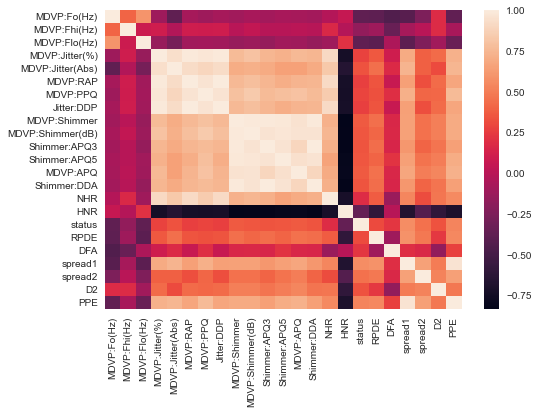

In [51]:
p1=sns.heatmap(df1.corr())
p1

In [52]:
# creating x,y arrays
features=shuffled.loc[:,shuffled.columns !='status'].values[:,1:]
label=shuffled.loc[:,'status'].values
label

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [53]:
shuffled['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

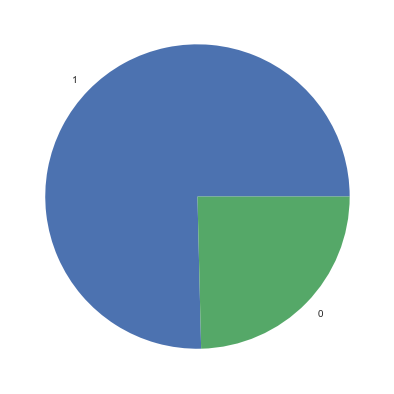

In [54]:
fig=plt.figure(figsize=(10,7))
plt.pie(shuffled['status'].value_counts(),labels=shuffled['status'].unique())
plt.show()

In [55]:
# rescaling feature values
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=label

In [56]:
# splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
# 1xgboost classifer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [62]:
model=XGBClassifier()
model.fit(x_train,y_train)   # fir with x and y train

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [65]:
y_prediction = model.predict(x_test)
print('Accuracy Score is',accuracy_score(y_test,y_prediction)*100)

Accuracy Score is 87.17948717948718


In [67]:
# 2 random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [69]:
y_pred= classifier.predict(x_test)
print('Accuracy Dcore is',accuracy_score(y_test,y_pred)*100)


Accuracy Dcore is 84.61538461538461


In [72]:
# Decision tree classifier
from sklearn import tree 
tr=tree.DecisionTreeClassifier()
tr.fit(x_train,y_train)
new_pred=tr.predict(x_test)

In [73]:
print('Accuracy Score is',accuracy_score(y_test,new_pred)*100)

Accuracy Score is 79.48717948717949


In [74]:
# SVM classifier
from sklearn import svm

# create svm classifier
mod=svm.SVC(kernel='rbf') # Linear kernel

#Train the model using the training sets
mod.fit(x_train,y_train)

#predict the response for test dataset
y_pred=mod.predict(x_test)

In [75]:
from sklearn import metrics
print('Accuracy Score is',metrics.accuracy_score(y_test,y_pred)*100)

Accuracy Score is 74.35897435897436
